## BPS Data Analysis

### Import Libraries

In [1]:
import pandas as pd
import plotly.io as pio
import plotly.express as px

template_style = 'plotly_white'
pio.renderers.default = 'svg'

In [2]:
#Importing Data from .xlsx file (Source: Badan Pusat Statistik)
df = pd.read_excel('Produksi_Tanaman_Sayuran_2020.xlsx')

### Data Cleaning

In [3]:
df.head()

,Provinsi,Bawang Merah (Ton),Bawang Putih (Ton),Bawang Daun (Ton),Kentang (Ton),Kubis (Ton),Kembang Kol (Ton),Petsai/Sawi (Ton),Wortel (Ton),Lobak (Ton),...,Buncis (Ton),Ketimun (Ton),Labu Siam (Ton),Kangkung (Ton),Bayam (Ton),Melinjo (Ton),Paprika (Ton),Jamur (Kg),Petai (Ton),Jengkol (Ton)
0,ACEH,11246.0,796.0,1479.0,12007.0,6070.0,514.0,3755.0,922.0,0.0,...,1078.0,14365.0,19852.0,7811.0,3838.0,11466.0,0.0,2674.0,757.0,3628.0
1,SUMATERA UTARA,29222.0,1339.0,13615.0,124326.0,201966.0,57739.0,75424.0,99306.0,1068.0,...,36597.0,24628.0,11203.0,16996.0,12786.0,4483.0,0.0,3712.0,20055.0,6759.0
2,SUMATERA BARAT,153770.0,4906.0,43814.0,23166.0,211711.0,17760.0,33929.0,32197.0,231.0,...,40639.0,30375.0,37765.0,9536.0,5173.0,10445.0,0.0,9807.0,19442.0,16357.0
3,RIAU,263.0,0.0,3.0,0.0,1.0,2.0,1423.0,40.0,0.0,...,1.0,17426.0,227.0,10769.0,8860.0,1297.0,40.0,4995.0,1777.0,4544.0
4,JAMBI,11977.0,502.0,3787.0,125001.0,42165.0,1607.0,7359.0,6331.0,380.0,...,5267.0,6268.0,7754.0,4167.0,2861.0,2821.0,4.0,1651.0,1988.0,5998.0


In [4]:
#Columns Rename
df.columns = df.columns.str.replace('[\(\)]', '', regex=True).str.replace('Ton', '').str.replace('Kg', '').str.replace('Provinsi', 'Province').str.rstrip()

In [5]:
df.columns

Index(['Province', 'Bawang Merah', 'Bawang Putih', 'Bawang Daun', 'Kentang',
       'Kubis', 'Kembang Kol', 'Petsai/Sawi', 'Wortel', 'Lobak',
       'Kacang Merah', 'Kacang Panjang', 'Cabai Besar', 'Cabai Rawit', 'Tomat',
       'Terung', 'Buncis', 'Ketimun', 'Labu Siam', 'Kangkung', 'Bayam',
       'Melinjo', 'Paprika', 'Jamur', 'Petai', 'Jengkol'],
      dtype='object')

In [6]:
#Convert Provinces Name to English
provinces_dict = {
    'ACEH':'Aceh',
    'SUMATERA UTARA':'North Sumatra',
    'SUMATERA BARAT':'West Sumatra',
    'RIAU':'Riau',
    'JAMBI':'Jambi',
    'SUMATERA SELATAN':'South Sumatra',
    'BENGKULU':'Bengkulu',
    'LAMPUNG':'Lampung',
    'KEP. BANGKA BELITUNG':'Bangka Belitung Islands',
    'KEP. RIAU':'Riau Islands',
    'DKI JAKARTA':'Jakarta',
    'JAWA BARAT':'West Java',
    'JAWA TENGAH':'Central Java',
    'DI YOGYAKARTA':'Yogyakarta',
    'JAWA TIMUR':'East Java',
    'BANTEN':'Banten',
    'BALI':'Bali',
    'NUSA TENGGARA BARAT':'West Nusa Tenggara',
    'NUSA TENGGARA TIMUR':'East Nusa Tenggara',
    'KALIMANTAN BARAT':'West Kalimantan',
    'KALIMANTAN TENGAH':'Central Kalimantan',
    'KALIMANTAN SELATAN':'South Kalimantan',
    'KALIMANTAN TIMUR':'East Kalimantan',
    'KALIMANTAN UTARA':'North Kalimantan',
    'SULAWESI UTARA':'North Sulawesi',
    'SULAWESI TENGAH':'Central Sulawesi',
    'SULAWESI SELATAN':'South Sulawesi',
    'SULAWESI TENGGARA':'Southeast Sulawesi',
    'GORONTALO':'Gorontalo',
    'SULAWESI BARAT':'West Sulawesi',
    'MALUKU':'Maluku',
    'MALUKU UTARA':'North Maluku',
    'PAPUA BARAT':'West Papua',
    'PAPUA':'Papua'
}

df['Province'] = df['Province'].replace(provinces_dict)

In [7]:
#Convert Commodities Name to English
commodities_dict ={
    'Bawang Merah':'Shallot', 
    'Bawang Putih':'Garlic', 
    'Bawang Daun':'Spring Onion', 
    'Kentang':'Potato',
    'Kubis':'Cabbage', 
    'Kembang Kol':'Cauliflower', 
    'Petsai/Sawi':'Mustard Greens', 
    'Wortel':'Carrot', 
    'Lobak':'Turnip',
    'Kacang Merah':'Red Beans', 
    'Kacang Panjang':'Long Beans', 
    'Cabai Besar':'Chili', 
    'Cabai Rawit':'Cayenne Pepper', 
    'Tomat':'Tomato',
    'Terung':'Eggplant', 
    'Buncis':'Green Beans', 
    'Ketimun':'Cucumber', 
    'Labu Siam':'Chayote', 
    'Kangkung':'Water Spinach', 
    'Bayam':'Spinach',
    'Melinjo':'Melinjo', 
    'Paprika':'Paprika', 
    'Jamur':'Mushroom', 
    'Petai':'Bitter Bean', 
    'Jengkol':'Jengkol'
}

df.rename(columns=commodities_dict, inplace=True)

In [8]:
#Converting Values From Kg to Ton
df['Mushroom'] = df['Mushroom'].div(1000)

In [9]:
#Converted Values of Jamur (Ton)
df['Mushroom'].head()

0    2.674
1    3.712
2    9.807
3    4.995
4    1.651
Name: Mushroom, dtype: float64

In [10]:
#Checking Any Missing Values 
df.isnull().sum()

Province          0
Shallot           0
Garlic            0
Spring Onion      0
Potato            0
Cabbage           0
Cauliflower       0
Mustard Greens    0
Carrot            0
Turnip            0
Red Beans         0
Long Beans        0
Chili             0
Cayenne Pepper    0
Tomato            0
Eggplant          0
Green Beans       0
Cucumber          0
Chayote           0
Water Spinach     0
Spinach           0
Melinjo           0
Paprika           0
Mushroom          0
Bitter Bean       0
Jengkol           0
dtype: int64

In [11]:
df.dtypes

Province           object
Shallot           float64
Garlic            float64
Spring Onion      float64
Potato            float64
Cabbage           float64
Cauliflower       float64
Mustard Greens    float64
Carrot            float64
Turnip            float64
Red Beans         float64
Long Beans        float64
Chili             float64
Cayenne Pepper    float64
Tomato            float64
Eggplant          float64
Green Beans       float64
Cucumber          float64
Chayote           float64
Water Spinach     float64
Spinach           float64
Melinjo           float64
Paprika           float64
Mushroom          float64
Bitter Bean       float64
Jengkol           float64
dtype: object

In [12]:
df.shape

(34, 26)

In [13]:
df.describe()

,Shallot,Garlic,Spring Onion,Potato,Cabbage,Cauliflower,Mustard Greens,Carrot,Turnip,Red Beans,...,Green Beans,Cucumber,Chayote,Water Spinach,Spinach,Melinjo,Paprika,Mushroom,Bitter Bean,Jengkol
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.00000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,53395.411765,2406.088235,17051.411765,37728.500000,41381.941176,6007.00000,19631.529412,19142.970588,732.382353,1947.382353,...,8997.735294,12978.970588,15029.794118,9186.382353,4618.323529,7528.970588,524.235294,97.538794,10312.823529,3798.323529
std,133370.879489,6956.316730,37718.756611,87192.089857,78802.052394,13839.21015,37698.043685,40560.375832,3069.031779,7290.904845,...,17829.239643,24019.194900,30616.057757,11675.511900,5914.772593,15133.237280,2064.140588,334.191216,24080.274872,5931.626205
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,18.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,133.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,264.000000,0.000000,325.250000,0.000000,2.250000,2.50000,2491.750000,0.000000,0.000000,0.000000,...,366.750000,3346.750000,117.250000,3292.250000,1366.250000,190.500000,0.000000,0.011250,65.000000,7.000000
50%,1129.500000,58.000000,1002.500000,134.500000,2000.000000,228.50000,4441.000000,82.000000,0.500000,44.000000,...,1743.500000,5583.000000,611.500000,4702.500000,2703.500000,769.500000,0.000000,1.698500,1171.000000,631.500000
75%,13649.500000,961.750000,4381.000000,9908.750000,38253.000000,1806.50000,13367.250000,6379.750000,211.500000,1169.000000,...,6194.750000,13796.250000,13858.750000,11730.500000,5097.000000,4067.500000,14.000000,14.696250,3882.750000,5828.250000
max,611165.000000,33304.000000,151427.000000,354196.000000,248923.000000,57739.00000,189354.000000,152000.000000,17864.000000,42419.000000,...,87576.000000,138575.000000,117855.000000,62504.000000,31371.000000,59588.000000,9336.000000,1740.456000,92445.000000,22649.000000


### Data Manipulation

In [14]:
#Generate Total Productions Column
df['Total Productions (Tons)'] = df.loc[:, 'Shallot':'Jengkol'].sum(axis=1)

In [15]:
df['Total Productions (Tons)'].head()

0     286062.674
1    1249333.712
2    1072100.807
3      92467.995
4     337499.651
Name: Total Productions (Tons), dtype: float64

In [16]:
#Generate Average Productions Column
df['Average Productions (Tons)'] = df.loc[:, 'Shallot':'Jengkol'].mean(axis=1)

In [17]:
df['Average Productions (Tons)'].head()

0    11442.50696
1    49973.34848
2    42884.03228
3     3698.71980
4    13499.98604
Name: Average Productions (Tons), dtype: float64

In [18]:
#Generate Top 5 Provinces by Total Productions & Average Productions
top_provinces = df.groupby('Province')[['Total Productions (Tons)', 'Average Productions (Tons)']].sum().sort_values(by= 'Total Productions (Tons)', ascending=False).head()

In [19]:
top_provinces

,Total Productions (Tons),Average Productions (Tons)
Province,,
West Java,2633388.456,105335.53824
East Java,2548477.579,101939.10316
Central Java,2469604.805,98784.19220
North Sumatra,1249333.712,49973.34848
West Sumatra,1072100.807,42884.03228


In [20]:
#Generate Bottom Provinces by Total Productions & Avergae Productions
bottom_provinces = df.groupby('Province')[['Total Productions (Tons)', 'Average Productions (Tons)']].sum().sort_values(by= 'Total Productions (Tons)', ascending=False).tail()

In [21]:
bottom_provinces

,Total Productions (Tons),Average Productions (Tons)
Province,,
Bangka Belitung Islands,27756.212,1110.24848
Gorontalo,19057.000,762.28000
West Papua,15010.036,600.40144
West Sulawesi,11218.000,448.72000
Jakarta,10366.000,414.64000


In [22]:
df['Province']

0                        Aceh
1               North Sumatra
2                West Sumatra
3                        Riau
4                       Jambi
5               South Sumatra
6                    Bengkulu
7                     Lampung
8     Bangka Belitung Islands
9                Riau Islands
10                    Jakarta
11                  West Java
12               Central Java
13                 Yogyakarta
14                  East Java
15                     Banten
16                       Bali
17         West Nusa Tenggara
18         East Nusa Tenggara
19            West Kalimantan
20         Central Kalimantan
21           South Kalimantan
22            East Kalimantan
23           North Kalimantan
24             North Sulawesi
25           Central Sulawesi
26             South Sulawesi
27         Southeast Sulawesi
28                  Gorontalo
29              West Sulawesi
30                     Maluku
31               North Maluku
32                 West Papua
33        

In [23]:
#Create Top 5 Commodities Function
def top5_commodities(idx):
    df_temp = df.loc[idx, 'Shallot':'Jengkol'].sort_values(ascending=False).head().reset_index()
    df_temp.rename(columns={'index':'Commodities', idx:'Total (Tons)'}, inplace=True)
    return df_temp

In [24]:
#Generate Top 5 Commodities in Indonesia 2020
top_ina = df.loc[:, 'Shallot':'Jengkol'].sum(axis=0).reset_index()
top_ina.rename(columns={'index': 'Commodities', 0:'Total (Tons)'}, inplace=True)
top_ina = top_ina.sort_values(by='Total (Tons)', ascending=False).head(10)

### Data Visualization

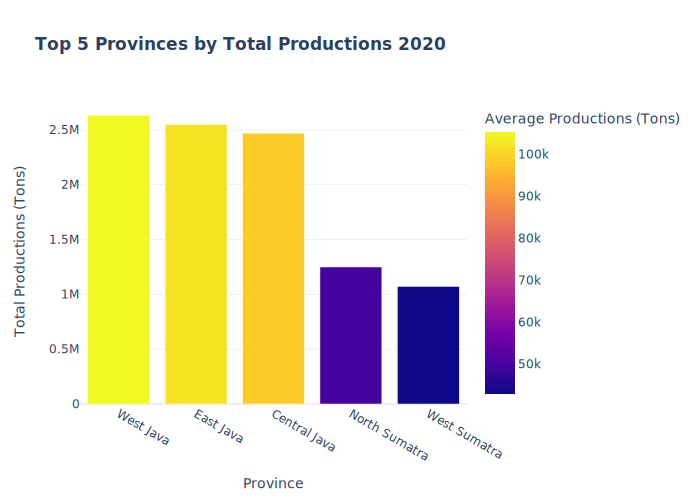

In [25]:
#Top 5 Provinces Bar chart
fig = px.bar(top_provinces, 
             y='Total Productions (Tons)', 
             title='<b>Top 5 Provinces by Total Productions 2020<b>', 
             color='Average Productions (Tons)', 
             template=template_style)
fig.show()

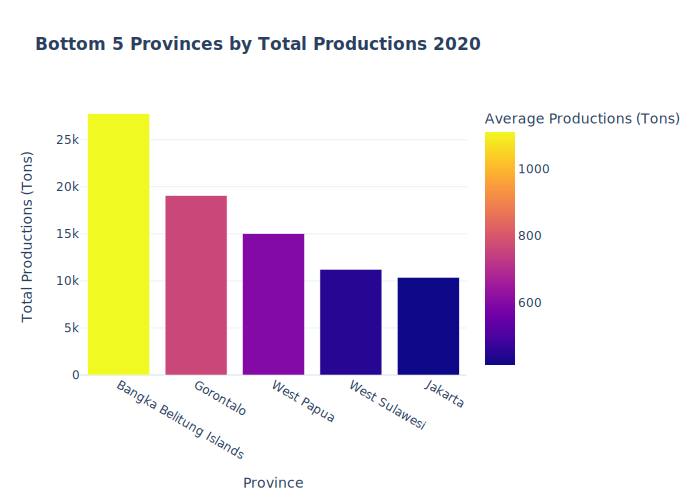

In [26]:
#Bottom 5 Provinces Bar Chart 
fig = px.bar(bottom_provinces, 
             y='Total Productions (Tons)', 
             title='<b>Bottom 5 Provinces by Total Productions 2020<b>', 
             color='Average Productions (Tons)', 
             template=template_style)
fig.show()

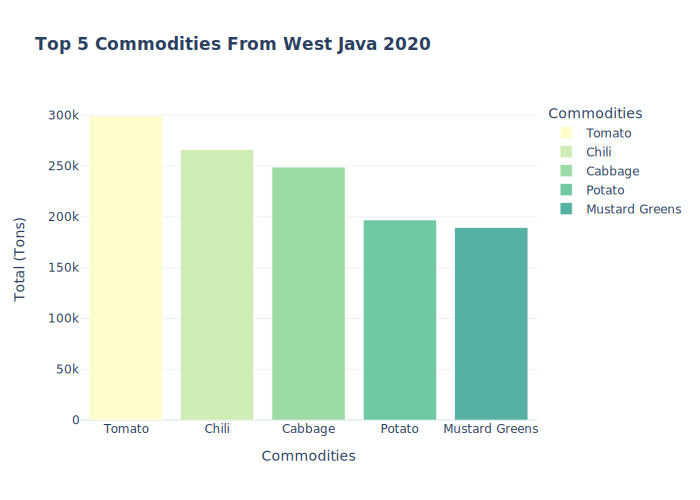

In [27]:
#Top 5 Commodities From Jawa Barat
west_java = top5_commodities(11)

fig = px.bar(west_java, 
             x='Commodities', 
             y='Total (Tons)',
             title='<b>Top 5 Commodities From West Java 2020<b>',
             color='Commodities',
             color_discrete_sequence=px.colors.sequential.deep, 
             template=template_style)
fig.show()

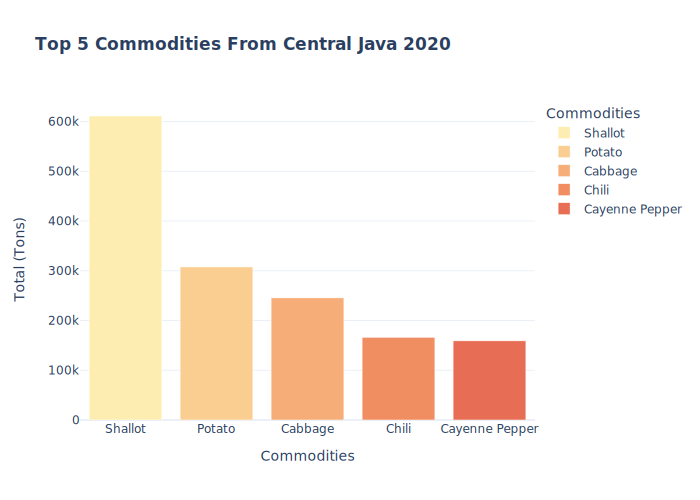

In [28]:
#Top 5 Commodities From Jawa Tengah
central_java = top5_commodities(12)

fig = px.bar(central_java, 
             x='Commodities', 
             y='Total (Tons)',
             title='<b>Top 5 Commodities From Central Java 2020<b>',
             color='Commodities',
             color_discrete_sequence=px.colors.sequential.matter, 
             template=template_style)
fig.show()

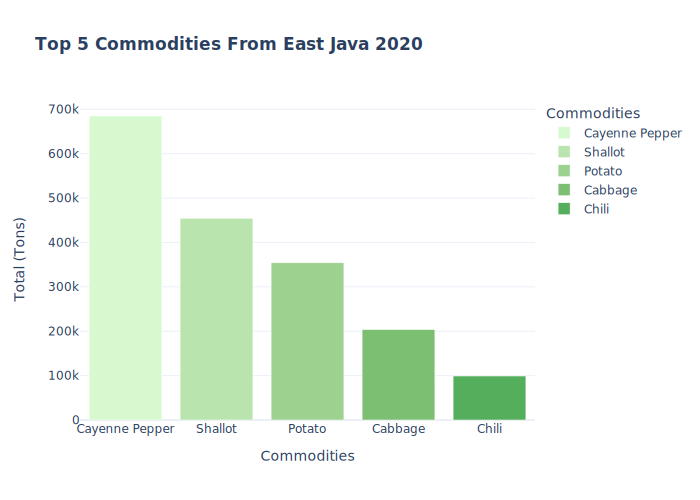

In [29]:
#Top 5 Commodities From Jawa Timur
east_java = top5_commodities(14)

fig = px.bar(east_java, 
             x='Commodities', 
             y='Total (Tons)',
             title='<b>Top 5 Commodities From East Java 2020<b>',
             color='Commodities',
             color_discrete_sequence=px.colors.sequential.algae, 
             template=template_style)
fig.show()

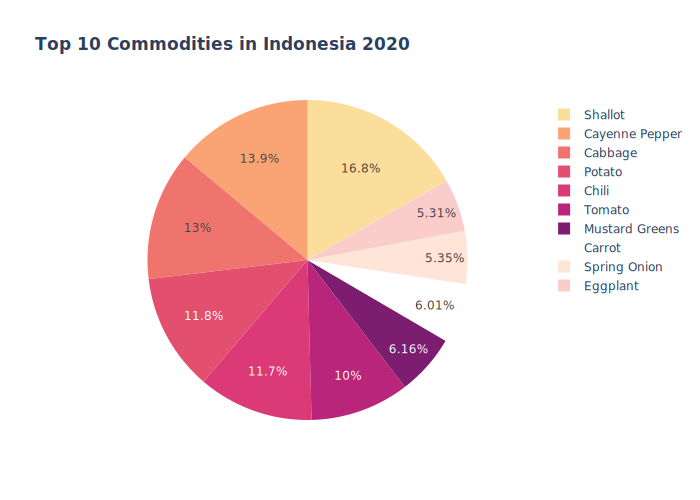

In [30]:
#Top 10 Commodities in Indonesia 2020
fig = px.pie(top_ina, 
             values='Total (Tons)', 
             names='Commodities',
             color_discrete_sequence=px.colors.sequential.Sunsetdark,
             title='<b>Top 10 Commodities in Indonesia 2020<b>', 
             template=template_style)
fig.show()